In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("computers.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
Units      14 non-null int64
Minutes    14 non-null int64
dtypes: int64(2)
memory usage: 304.0 bytes


In [67]:
class LinearRegressionUnivariate:
    
    def __init__(self):
        self.m = 0
        self.c = 0
    
    def fit(self, X, Y, learning_rate = 0.01):
    
        # yhat = mX + c
        m = self.m
        c = self.c
        n = len(X)
        for i in range(10000):
            yhat = m*X + c
            dm = (-2/n)*sum(X*(Y - yhat))  # derivative of "y" w.r.t m(Slope)
            dc = (-2/n)*sum(Y-yhat)        # derivative of "y" w.r.t c(intercept)
            m = m - learning_rate * dm 
            c = c - learning_rate * dc
            
            if i%1000==0:
                print("slope(m) = {} \t intercept(c) == {}".format(m,c))
            
        self.m = m
        self.c = c
        
    def predict(self,X):
        return np.array([self.m*x + self.c for x in X])

    def r_squared_score(self):
        y_hat = np.array([self.m*x + self.c for x in X])
        ss_r = sum((Y-y_hat)**2)         # sum of square regressor = summation(y-yhat)^2
        ss_t = sum((Y-np.mean(Y))**2)    # sum of square total = summation(y-y_mean)^2
        r_square = 1-(ss_r/ss_t)
        return r_square

In [68]:
clf = LinearRegressionUnivariate()

In [69]:
X = np.array(df["Units"])
Y = np.array(df["Minutes"])
clf.fit(X,Y)

slope(m) = 14.191428571428572 	 intercept(c) == 1.9442857142857142
slope(m) = 15.516020445254272 	 intercept(c) == 4.108544563809838
slope(m) = 15.508964382410223 	 intercept(c) == 4.160244043235595
slope(m) = 15.508777039560217 	 intercept(c) == 4.161616696517412
slope(m) = 15.508772065491215 	 intercept(c) == 4.161653141314401
slope(m) = 15.508771933426594 	 intercept(c) == 4.161654108946394
slope(m) = 15.508771929920197 	 intercept(c) == 4.161654134637624
slope(m) = 15.5087719298271 	 intercept(c) == 4.161654135319738
slope(m) = 15.508771929824631 	 intercept(c) == 4.161654135337842
slope(m) = 15.50877192982458 	 intercept(c) == 4.161654135338218


In [70]:
X_pred = [0,2,2,3,5,6,7,8,9,11]
y_pred = clf.predict(X_pred)

15.50877192982458 4.161654135338218


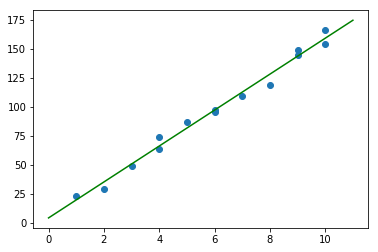

In [71]:
plt.scatter(X,Y)
plt.plot([min(X_pred), max(X_pred)], [min(y_pred), max(y_pred)], color = "green")
print(clf.m, clf.c)

In [74]:
print(clf.r_squared_score())

0.9874371980620736
